In [1]:
import math

class Vector:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    def __str__(self):
        return f"{self.x}i + {self.y}j + {self.z}k"

    def __getitem__(self, item):
        if item == 0:
            return self.x
        elif item == 1:
            return self.y
        elif item == 2:
            return self.z
        else:
            raise IndexError("There are only three elements in the vector")

    def __add__(self, other):
        return Vector(
            self.x + other.x,
            self.y + other.y,
            self.z + other.z,
        )

    def __sub__(self, other):
        return Vector(
            self.x - other.x,
            self.y - other.y,
            self.z - other.z,
        )

    def __mul__(self, other):
        if isinstance(other, Vector):  # Vector dot product
            return (
                self.x * other.x
                + self.y * other.y
                + self.z * other.z
            )
        elif isinstance(other, (int, float)):  # Scalar multiplication
            return Vector(
                self.x * other,
                self.y * other,
                self.z * other,
            )
        else:
            raise TypeError("operand must be Vector, int, or float")

    def __truediv__(self, other):
        if isinstance(other, (int, float)):
            return Vector(
                self.x / other,
                self.y / other,
                self.z / other,
            )
        else:
            raise TypeError("operand must be int or float")

    def get_magnitude(self):
        return (self.x ** 2 + self.y ** 2 + self.z ** 2) ** 0.5

    def normalize(self):
        magnitude = self.get_magnitude()
        return Vector(
            self.x / magnitude,
            self.y / magnitude,
            self.z / magnitude,
        )

In [2]:
import matplotlib.pyplot as plt
import itertools

class SolarSystem:
    def __init__(self, size):
        self.size = size
        self.bodies = []
        
    def add_body(self, body):
        self.bodies.append(body)
        
    def update_all(self):
        self.bodies.sort(key=lambda item: item.position[0])
        for body in self.bodies:
            body.move()
            body.draw()
            
    def move_bodies(self):
        for body in self.bodies:
            body.move()
            
    def draw_paths(self):
        for body in self.bodies:
            body.draw_line_path()
            
    def draw_first_path(self):
        self.bodies[0].draw_line_path()
        
    def draw_all(self):
        plt.pause(0.001)
        
    def calculate_all_body_interactions(self):
        for i in range(len(self.bodies)):
            for j in range(i + 1, len(self.bodies)):
                self.bodies[i].accelerate_due_to_gravity(self.bodies[j])
                self.bodies[j].accelerate_due_to_gravity(self.bodies[i])
                
        '''
        bodies_copy = self.bodies.copy()
        for idx, first in enumerate(bodies_copy):
            for second in bodies_copy[idx + 1:]:
                first.accelerate_due_to_gravity(second)
        '''

FACTOR = 1
                
class SolarSystemBody:
    min_display_size = 10
    display_log_base = 1.3
    def __init__(
        self,
        solar_system,
        mass,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        self.solar_system = solar_system
        self.mass = mass
        self.position = position
        self.velocity = Vector(*velocity)
        self.display_size = max(
            math.log(self.mass, self.display_log_base),
            self.min_display_size,
        )
        self.colour = "black"
        self.solar_system.add_body(self)
        self.positions = []
        
    def move(self):
        self.position = (
            self.position[0] + self.velocity[0] * FACTOR,
            self.position[1] + self.velocity[1] * FACTOR,
            self.position[2] + self.velocity[2] * FACTOR,
        )
        self.positions.append(self.position)
    
    def draw(self):
        self.solar_system.ax.plot(
            *self.position,
            marker="o",
            markersize=self.display_size + self.position[0] / 30,
            color=self.colour
        )
    
    def draw_path_old(self):
        for position in self.positions:
            self.solar_system.ax.plot(
                *position,
                marker="o",
                #markersize=self.display_size + self.position[0] / 30,
                markersize=0.1,
                color=self.colour
            )
            
    def draw_line_path(self):
        for i in range(1, len(self.positions)):
            start_pos = self.positions[i - 1]
            end_pos = self.positions[i]
            x1 = start_pos[0]
            y1 = start_pos[1]
            x2 = end_pos[0]
            y2 = end_pos[1] 
            p1, p2 = [x1, x2], [y1, y2]
            plt.plot(p1, p2, color=self.colour)
    
    def accelerate_due_to_gravity(self, other):
        distance = Vector(*other.position) - Vector(*self.position)
        distance_mag = distance.get_magnitude()
        force_mag = self.mass * other.mass / distance_mag
        force = distance.normalize() * force_mag
        reverse = 1
        for body in self, other:
            acceleration = force / body.mass
            body.velocity += acceleration * reverse
            reverse = -1

In [3]:
class Sun(SolarSystemBody):
    def __init__(
        self,
        solar_system,
        mass=10_000,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        super(Sun, self).__init__(solar_system, mass, position, velocity)
        self.colour = "yellow"

class Planet(SolarSystemBody):
    def __init__(
        self,
        solar_system,
        mass=100,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
        colour="black"
    ):
        super(Planet, self).__init__(solar_system, mass, position, velocity)
        self.colour = colour

creating planets
1.4280518937982691
-1.422218906497708
1.5618260226894076
-5.878035357209965
6.266425027146401
6.47177745066891
3.0694506780235145
-6.795408869623607
0.413387192798492
creating planets
-3.4445437675581374
-5.000066466271993
9.056338182918232
9.931139850789105
-9.108872350991339
7.203220745725819
2.063812219363701
-2.3678802816176425
-4.327635641865697
creating planets
3.49929694269912
-0.8633769788338874
3.7172297094918942
3.236926401047022
-7.340437105755743
5.356756278879811
9.648264980223818
9.387763208098377
2.2665364109341795


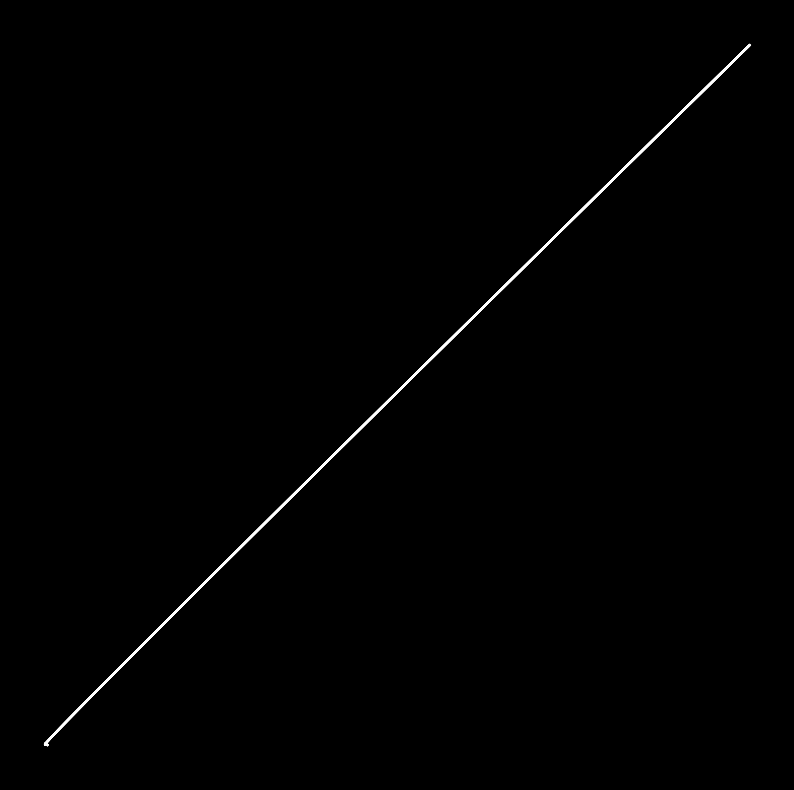

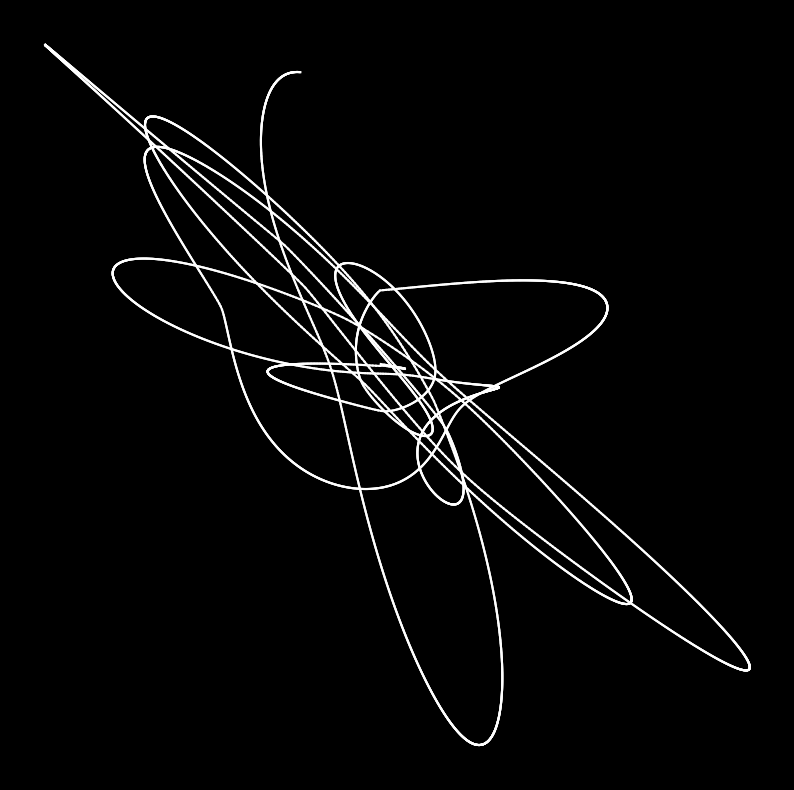

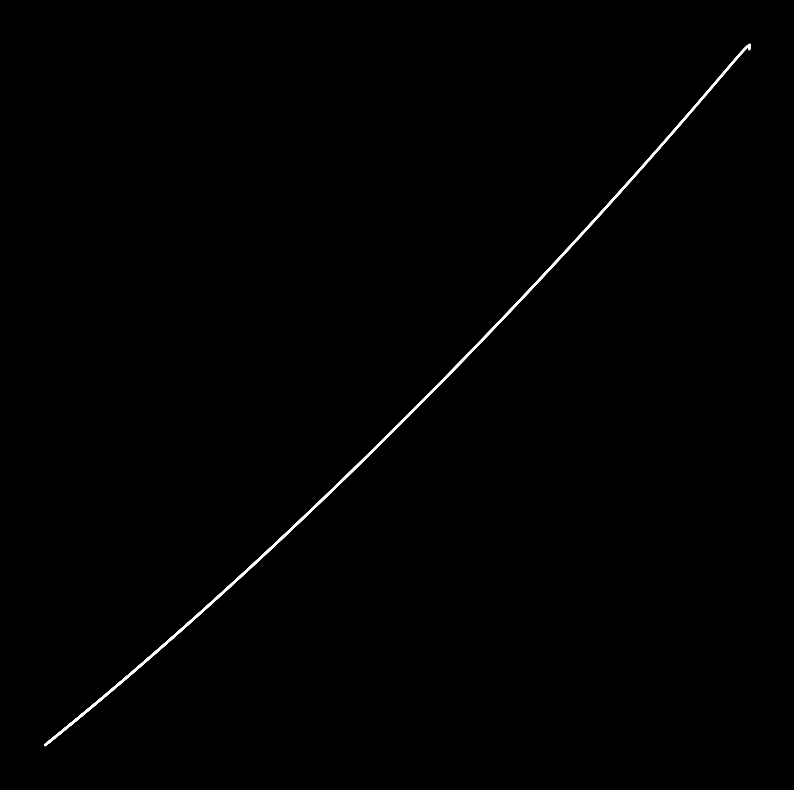

In [4]:
%matplotlib inline
import random
'''
suns = (
    Sun(solar_system, position=(100, 100, 100), velocity=(0.1, 0.1, 0.1)),
    Sun(solar_system, position=(-40, -40, -40), velocity=(-0.1, -0.1, -0.1)),
    Sun(solar_system, position=(0.5, 0.5, 0.5), velocity=(0.5, 0.5, 0.5)),
)
'''

def create_4_planets():
    planets = (
        Planet(
            solar_system,
            10,
            position=(25, 25, 0),
            velocity=(0, 0, 0),
            colour="red"
        ),
        Planet(
            solar_system,
            20,
            position=(0, 50, 0),
            velocity=(0, 0, 0),
            colour="green"
        ),
        Planet(
            solar_system,
            20,
            position=(1, 2.3, 51),
            velocity=(0, 0, 0),
            colour="orange"
        ),
        Planet(
            solar_system,
            20,
            position=(1, 2.3, 32),
            velocity=(0, 0, 0),
            colour="yellow"
        ),
    )

random.seed(10)
def ran():
    K = 10
    result = random.random() * 2 * K - K
    print(result)
    return result

def create_3_planets(solar_system):
    print("creating planets")
    planets = (
        Planet(
            solar_system,
            20,
            position=(ran(), ran(), ran()),
            velocity=(0, 0, 0),
            colour="white"
        ),
        Planet(
            solar_system,
            20,
            position=(ran(), ran(), ran()),
            velocity=(0, 0, 0),
            colour="green"
        ),
        Planet(
            solar_system,
            20,
            position=(ran(), ran(), ran()),
            velocity=(0, 0, 0),
            colour="orange"
        ),
    )
    
def make_image(num):
    solar_system = SolarSystem(500)
    create_3_planets(solar_system)

    for _ in range(5000):
        solar_system.calculate_all_body_interactions()
        solar_system.move_bodies()


    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(10)
    f.patch.set_facecolor('black')
    
    ax = plt.axes()
    

    solar_system.draw_first_path()

    plt.axis('off')
    plt.ioff()
    
    plt.savefig(f'/Users/tarasbobrovytsky/Documents/planet_{num:02d}.png')
    
for num in range(3):
    make_image(num)


In [114]:
for _ in range(1000):
    solar_system.calculate_all_body_interactions()
    solar_system.update_all()
    solar_system.draw_all()